# Week 3 - Probability Distributions 1 and 2

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
    - Bayesian approach
        - Maximum posterior
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [2]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 26
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

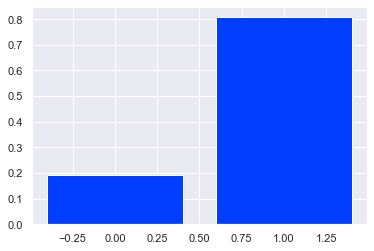

In [3]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

In [4]:
def bern(x, mu):
    return mu**x * (1-mu)**(1-x)

### 1.2) Maximum Likelihood

In [5]:
def mu_maximum_likelihood(train_data):
    return 1/len(train_data) * sum(train_data)

mu_ml = mu_maximum_likelihood(train_data)

### 1.3) Display distribution

In [6]:
def display_bernoulli(mu, color='b'):

    xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        xs
    ))

    plt.plot(xs,ys, '-' + color)

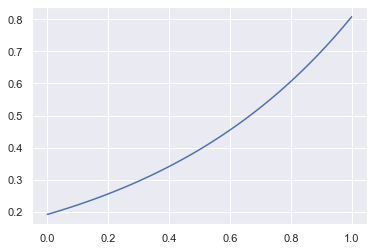

In [7]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

In [21]:
def binomial(m, N, mu):
    return comb(N, m) * mu**m * (1-mu)**(N - m)

### 2.2) Display Binomial distribution for different m

In [19]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)

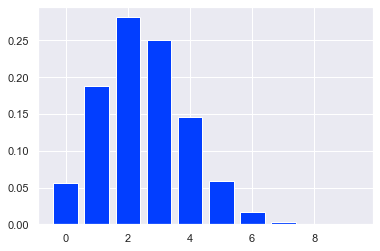

In [20]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

In [28]:
def mu_maximum_posterior(m, N, a, b):
    return (m+a)/(m+a+N-m+b)

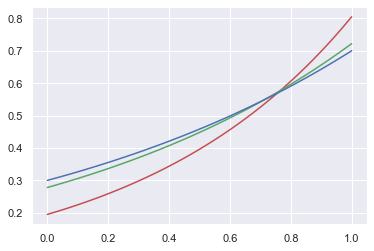

In [29]:
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 0.1, 0.1), 'r'
)
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 70, 30), 'g'
)
display_bernoulli(
    mu_maximum_posterior(sum(train_data), train_size, 7000, 3000), 'b'
)

## 3) Multinomial variables

### 3.1) Generate data

In [30]:
np.random.seed(26)

def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(26, probabilities)
multinomial_data

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial Bernoulli distribution function

In [ ]:
def bern_multi(xs, mus):
    pass

#### 3.2.2) Maximum likelihood
find multinomial dist in book, p 75

In [ ]:
def multinomial_mu_maximum_likelihood(multinomial_data):
    pass

multi_mu_ml = multinomial_mu_maximum_likelihood(multinomial_data)
multi_mu_ml

### 3.3) Bayesian approach

#### 3.3.1) Maximum posterior
Kommentar fra TØ: <br>
Maximum posterior er det samme som maximum likelihood men bare for $F(\hat{\alpha})$<br>
Vi kender $ML(F(\alpha))$(max likelihood). Vi har posterior $P(\alpha)=F(\hat{\alpha})$. Maximum posterior er da $MP=ML(P(\alpha))$.<br>
$ML(P)=ML(Beta(\hat{a},\hat{b}))=\frac{\hat{a}}{\hat{a}+\hat{b}}=\frac{m+a}{m+l+a+b}$

In [ ]:
def multinomial_mu_maximum_posterior(ms, N, alphas):
    pass

ms = list(map(lambda k: sum(multinomial_data[:, k]), range(len(multinomial_data[0]))))

In [ ]:
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [5, 1, 2, 1, 1]))
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [50, 10, 20, 10, 10]))
print(multinomial_mu_maximum_posterior(ms, len(multinomial_data), [500, 100, 200, 100, 100]))

In [ ]:
print(probabilities)

## 4) Gaussian distribution

### 4.1) Distribution function

In [ ]:
def multi_gaussian(x, mean, covariance):
    pass

### 4.2) Generate data

In [ ]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [1.7, -4]
target_cov = [[1, 0.1], [0.1, 1]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)

### 4.3) Display data

In [ ]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)

display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Frequenist's approach

#### 4.4.1) Maximum likelihood

In [ ]:
def gaussian_mu_maximum_likelihood(multi_gaussian_data):
    pass

g_mu_ml = gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

In [ ]:
def gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    pass

g_cov_ml = gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml

#### 4.4.2) Display distribution

In [ ]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Bayesian approach

#### 4.5.1) Generate data

In [ ]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Variance is known, mean is unknown

In [ ]:
def gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    pass

g_mu_map, g_mu_var_map = gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

#### 4.5.3) Display mean estimation for different N

In [ ]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

display_mu_map(gaussian_data[:0], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)